# Linear Regression Project- Boston Housing Dataset (First Attempt)

In [57]:
#Load necessary libararies and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston_sklearn=load_boston()

In [41]:
print(boston_sklearn.keys())
print(boston_sklearn.data.shape)
print(boston_sklearn.feature_names)
print(boston_sklearn.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

### Now that we know the basics of the data, let's explore it.

In [42]:
X=boston_sklearn.data
y=boston_sklearn.target
boston=pd.DataFrame(X, columns=boston_sklearn.feature_names)

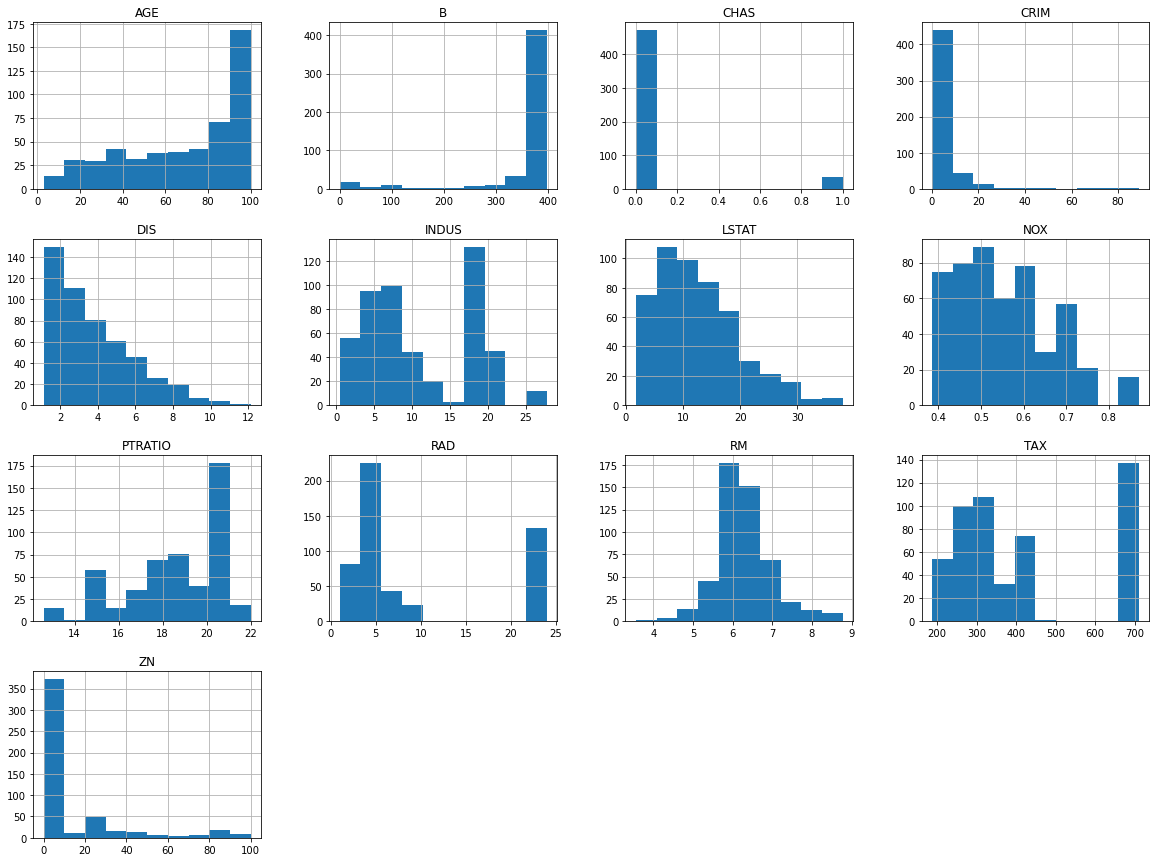

In [43]:
boston.hist(bins=10, figsize=(20, 15))
plt.show()

In [44]:
#Many histograms are tail-heavy, we will transform these attributes later if they are needed for the model

In [45]:
boston['MEDV']=boston_sklearn.target
display(boston.head())
display(boston.info())
display(boston.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


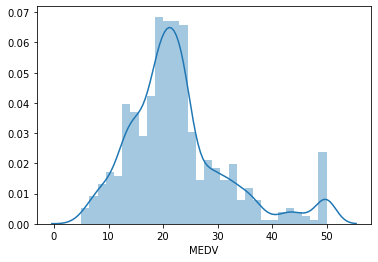

In [46]:
#Let's explore the distribution of the target variable

sns.distplot(boston['MEDV'], bins=30)
plt.show()

### The values of of MEDV are normally distributed with a few outliers

In [23]:
#Create a test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

### We will now only work with the training data and use the test data at the end to score the model

In [24]:
boston_train=pd.DataFrame(X_train, columns=boston_sklearn.feature_names)

boston_train['MEDV']=y_train
print(boston_train.head())

       CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
1   0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
2   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
3   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
4   0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

   PTRATIO       B  LSTAT  MEDV  
0     20.2  349.48  24.91  12.0  
1     21.0  395.62   8.47  19.9  
2     16.9  362.25   7.83  19.4  
3     20.2    2.52  23.29  13.4  
4     21.0  390.95  11.28  18.2  


In [ ]:
### Let's find the standard correlation coefficient between every pair of attributes

In [47]:
corr_matrix=boston_train.corr().round(2)
display(corr_matrix)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.40,-0.04,0.40,-0.20,0.33,-0.37,0.62,0.58,0.29,-0.36,0.41,-0.38
ZN,-0.20,1.00,-0.53,-0.04,-0.53,0.27,-0.58,0.68,-0.31,-0.29,-0.39,0.18,-0.40,0.31
INDUS,0.40,-0.53,1.00,0.10,0.77,-0.40,0.64,-0.71,0.59,0.70,0.35,-0.36,0.60,-0.47
CHAS,-0.04,-0.04,0.10,1.00,0.14,0.11,0.10,-0.12,0.03,0.01,-0.11,0.04,-0.07,0.19
NOX,0.40,-0.53,0.77,0.14,1.00,-0.30,0.72,-0.77,0.59,0.65,0.16,-0.37,0.59,-0.42
RM,-0.20,0.27,-0.40,0.11,-0.30,1.00,-0.21,0.20,-0.20,-0.28,-0.34,0.11,-0.61,0.71
AGE,0.33,-0.58,0.64,0.10,0.72,-0.21,1.00,-0.76,0.43,0.47,0.24,-0.27,0.57,-0.34
DIS,-0.37,0.68,-0.71,-0.12,-0.77,0.20,-0.76,1.00,-0.48,-0.52,-0.22,0.29,-0.49,0.24
RAD,0.62,-0.31,0.59,0.03,0.59,-0.20,0.43,-0.48,1.00,0.91,0.47,-0.44,0.48,-0.39
TAX,0.58,-0.29,0.70,0.01,0.65,-0.28,0.47,-0.52,0.91,1.00,0.44,-0.44,0.53,-0.46


#### The highest correlation between two features is 0.91 between RAD and TAX. We should not select both these features to build our model. The correlation between DIS and AGE (-0.76) is also high and should not be selected together.

#### Let's view the same data in a Seaborn heatmap

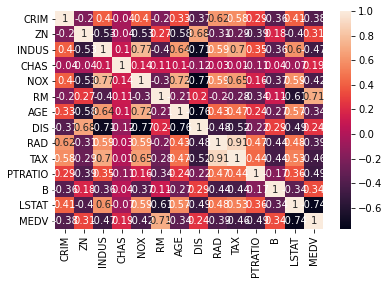

In [51]:
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

#### Now let's look at how much each attribute correlates only with the median house value 

In [29]:
print(corr_matrix['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64


#### The most promising attributes to predict the median house value are RM and LSTAT. Let's take a closer look at their correlation scatterplots

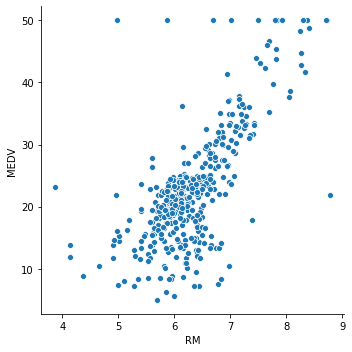

In [36]:
sns.relplot(x='RM', y='MEDV', data=boston_train, kind='scatter')
plt.show()

#### The plot reveals that the correlation is strong, and also that the median house value has been capped at $50,000.

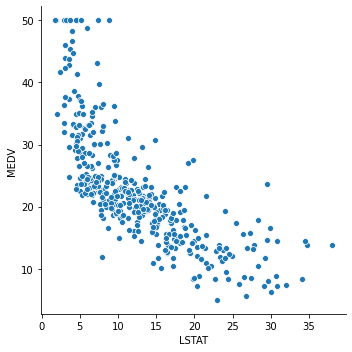

In [37]:
sns.relplot(x='LSTAT', y='MEDV', data=boston_train, kind='scatter')
plt.show()

#### Similar to the RM attribute, the correlation between LSTAT and MEDV is strong.

### Now that we have a sense for the data, let's frame the problem: It is a supervised learning task, a multiple regression task, and a univariate regression problem.

### There are 506 instances in the dataset, which is very small by ML standards.The performace measure we will use for this task is the RMSE

### Let's create a model to predict MEDV using LSTAT and RM

In [54]:
#Create variables
X_reg=boston_train[['LSTAT', 'RM']]
y_reg=boston_train['MEDV']

lin_model=LinearRegression()
lin_model.fit(X_reg, y_reg)

LinearRegression()

#### We will evaluate the model using r-squared and mean_squared_error

In [62]:
y_train_pred=lin_model.predict(X_reg)

In [76]:
rmse_train=np.sqrt(mean_squared_error(y_reg, y_train_pred))
r_squared_train=r2_score(y_reg, y_train_pred)

print("The model performance for the training set is:")
print('The RMSE is {}'.format(rmse_train))
print('The R2 score is {}'.format(r_squared_train))

The model performance for the training set is:
The RMSE is 5.512880843371696
The R2 score is 0.6501592679428922


In [70]:
boston_test=pd.DataFrame(X_test, columns=boston_sklearn.feature_names)

boston_test['MEDV']=y_test

In [72]:
X_test_reg=boston_test[['LSTAT', 'RM']]
y_test_reg=boston_test['MEDV']

In [73]:
y_test_pred=lin_model.predict(X_test_reg)

In [77]:
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared_test=r2_score(y_test, y_test_pred)

print("The model performance for the testing set is:")
print('The RMSE is {}'.format(rmse_test))
print('The R2 score is {}'.format(r_squared_test))

The model performance for the testing set is:
The RMSE is 5.589569804715174
The R2 score is 0.5739577415025858


### I will try to increase the model's performace in my next attempt.